In [4]:
import requests
import json
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pprint import pprint
from config import api_key
import random
import matplotlib.colors as mcolors
from pandas_profiling import ProfileReport


blockbusters_df = pd.read_csv("data/blockbusters.csv")
moviebudget_df= pd.read_csv("data/Movie_budget.csv")
movieid_df= pd.read_csv("data/metadata.csv")

#Merging and cleaning data 
#Merge 1
budgetbuster_df = pd.merge(moviebudget_df,blockbusters_df, how = "right", on = "Title")
budgetbuster_df = budgetbuster_df.drop(["Worldwide_gross","Release Date","length", "rank_in_year", "rating","Year_x"], axis=1, inplace = False)
budgetbuster_df = budgetbuster_df.rename(columns={"Year_y":"Year"})
budgetbuster_df = budgetbuster_df.dropna(axis=0,inplace= False)
budgetbuster_df["Production Budget"] = budgetbuster_df["Production Budget"].astype(float)
budgetbuster_df["Domestic Gross"] = budgetbuster_df["Domestic Gross"].astype(float)
budgetbuster_df["Worldwide Gross"] = budgetbuster_df["Worldwide Gross"].astype(float)
budgetbuster_df = budgetbuster_df.drop_duplicates(subset=["Title","Year"],inplace= False)
budgetbuster_df.to_csv("datacreatedcsv/budgetbuster.csv", index_label="Movie ID")
budgetbuster_df

/var/folders/7n/69c43vz1219_5v9rz55v0vk40000gn/T/ipykernel_7900/2915149892.py:17: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movieid_df= pd.read_csv("data/metadata.csv")


,Rank,Title,Production Budget,Domestic Gross,Worldwide Gross,Main Genre,2nd Genre,3rd Genre,IMDB Rating,Studio,Year
0,48,Black Panther,200000000.0,700059566.0,1.336494e+09,Action,Adventure,Drama,7.4,Walt Disney Pictures,2018
1,5,Avengers: Infinity War,300000000.0,678815482.0,2.048360e+09,Action,Adventure,Sci-Fi,8.5,Walt Disney Pictures,2018
2,50,Incredibles 2,200000000.0,608581744.0,1.242805e+09,Animation,Action,Adventure,7.8,Pixar,2018
3,144,Jurassic World: Fallen Kingdom,170000000.0,417719760.0,1.308323e+09,Action,Adventure,Drama,6.2,Universal Pictures,2018
7,11,Solo: A Star Wars Story,275000000.0,213767512.0,3.931513e+08,Action,Adventure,Drama,7.0,Walt Disney Pictures,2018
...,...,...,...,...,...,...,...,...,...,...,...
442,"4,918",Annie Hall,4000000.0,38251425.0,3.825142e+07,Romance,Drama,Comedy,8.1,Metro-Goldwyn-Mayer,1977
447,"2,387",The Omen,25000000.0,54607383.0,1.192956e+08,Thriller,Horror,Drama,7.6,20th Century Fox,1976
450,44,King Kong,207000000.0,218080025.0,5.505174e+08,Horror,Fantasy,Adventure,5.8,Paramount Pictures,1976
455,445,Midway,100000000.0,56846802.0,1.268150e+08,History,Drama,Action,6.7,Universal Pictures,1976


In [5]:
#Cleaning movie_id 
movieid_df = movieid_df.drop(["adult","belongs_to_collection","budget","homepage","id","Title","original_language","overview","revenue","runtime",
                                "spoken_languages","status", "tagline","video","vote_average","vote_count","popularity","poster_path","production_companies",
                                "production_countries","genres"], axis=1, inplace = False)
movieid_df = movieid_df.dropna(axis=0,inplace= False)
movieid_df['release_date'] = pd.to_datetime(movieid_df['release_date'])
movieid_df['Year'] = movieid_df['release_date'].dt.year
movieid_df = movieid_df.drop(["release_date"], axis=1, inplace = False)
movieid_df = movieid_df.rename(columns={"imdb_id":"IMDb ID", "title":"Title"})
movieid_df.to_csv("datacreatedcsv/movieid.csv", index_label="Movie ID")
movieid_df

,IMDb ID,Title,Year
0,tt0114709,Toy Story,1995
1,tt0113497,Jumanji,1995
2,tt0113228,Grumpier Old Men,1995
3,tt0114885,Waiting to Exhale,1995
4,tt0113041,Father of the Bride Part II,1995
...,...,...,...
45460,tt0102797,Robin Hood,1991
45462,tt2028550,Century of Birthing,2011
45463,tt0303758,Betrayal,2003
45464,tt0008536,Satan Triumphant,1917


In [6]:
#Merging all csv together
csvmovies_df = pd.merge(budgetbuster_df,movieid_df, how= "left", on=["Title","Year"])
csvmovies_df = csvmovies_df.drop_duplicates(subset=["Title","Year"],inplace= False)
csvmovies_df.to_csv("datacreatedcsv/csvmovies.csv", index_label="Movie ID")
csvmovies_df

,Rank,Title,Production Budget,Domestic Gross,Worldwide Gross,Main Genre,2nd Genre,3rd Genre,IMDB Rating,Studio,Year,IMDb ID
0,48,Black Panther,200000000.0,700059566.0,1.336494e+09,Action,Adventure,Drama,7.4,Walt Disney Pictures,2018,NaN
1,5,Avengers: Infinity War,300000000.0,678815482.0,2.048360e+09,Action,Adventure,Sci-Fi,8.5,Walt Disney Pictures,2018,NaN
2,50,Incredibles 2,200000000.0,608581744.0,1.242805e+09,Animation,Action,Adventure,7.8,Pixar,2018,NaN
3,144,Jurassic World: Fallen Kingdom,170000000.0,417719760.0,1.308323e+09,Action,Adventure,Drama,6.2,Universal Pictures,2018,NaN
4,11,Solo: A Star Wars Story,275000000.0,213767512.0,3.931513e+08,Action,Adventure,Drama,7.0,Walt Disney Pictures,2018,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
217,"4,918",Annie Hall,4000000.0,38251425.0,3.825142e+07,Romance,Drama,Comedy,8.1,Metro-Goldwyn-Mayer,1977,tt0075686
218,"2,387",The Omen,25000000.0,54607383.0,1.192956e+08,Thriller,Horror,Drama,7.6,20th Century Fox,1976,tt0075005
219,44,King Kong,207000000.0,218080025.0,5.505174e+08,Horror,Fantasy,Adventure,5.8,Paramount Pictures,1976,tt0074751
220,445,Midway,100000000.0,56846802.0,1.268150e+08,History,Drama,Action,6.7,Universal Pictures,1976,tt0074899


In [7]:
#Retrieving Data from OMDb 
#Adding director based on title with null IMDb ID
NaNid_df = csvmovies_df[csvmovies_df["IMDb ID"].isnull()]
title =NaNid_df["Title"].tolist()
url = "http://www.omdbapi.com/?apikey=" + api_key + "&t="
title_response = []

for movie in title:
    movie_data = requests.get(url + movie).json()
    
    try:
        directors = movie_data["Director"]
    except:
        diretors = "N/A"


    title_response.append({ "Title":movie,
                    "Director": directors})
  
    print(f"{movie} was directed by {directors}")



Black Panther was directed by Ryan Coogler
Avengers: Infinity War was directed by Anthony Russo, Joe Russo
Incredibles 2 was directed by Brad Bird
Jurassic World: Fallen Kingdom was directed by J.A. Bayona
Solo: A Star Wars Story was directed by Ron Howard
Venom was directed by Ruben Fleischer
Jumanji: Welcome to the Jungle was directed by Jake Kasdan
Spider-Man: Homecoming was directed by Jon Watts
It was directed by Andy Muschietti
WALL-E was directed by Andrew Stanton
300 was directed by Zack Snyder
Superman II was directed by Richard Lester, Richard Donner


In [8]:
#Retrieving Data from OMDb 
#Adding director based on title with null IMDb ID
imdbid_df = csvmovies_df.dropna(axis=0,inplace= False)
imdbid = imdbid_df["IMDb ID"].tolist()
url = "http://www.omdbapi.com/?apikey=" + api_key + "&i="
id_response = []

for id in imdbid:
    movie_data = requests.get(url + id).json()
    
    try:
        directors = movie_data["Director"]
    except:
        diretors = "N/A"


    id_response.append({ "IMDb ID":id,
                    "Director": directors})
  
    print(f"{id} was directed by {directors}")

tt0451279 was directed by Patty Jenkins
tt3501632 was directed by Taika Waititi
tt0974015 was directed by Zack Snyder
tt3748528 was directed by Gareth Edwards
tt3498820 was directed by Anthony Russo, Joe Russo
tt1431045 was directed by Tim Miller
tt2948356 was directed by Byron Howard, Rich Moore, Jared Bush
tt2975590 was directed by Zack Snyder
tt3470600 was directed by Garth Jennings, Christophe Lourdelet
tt0369610 was directed by Colin Trevorrow
tt2395427 was directed by Joss Whedon
tt2820852 was directed by James Wan
tt2293640 was directed by Kyle Balda, Pierre Coffin
tt1951266 was directed by Francis Lawrence
tt2109248 was directed by Michael Bay
tt2015381 was directed by James Gunn
tt1587310 was directed by Robert Stromberg
tt1877832 was directed by Bryan Singer
tt1843866 was directed by Anthony Russo, Joe Russo
tt1872181 was directed by Marc Webb
tt2103281 was directed by Matt Reeves
tt2294629 was directed by Chris Buck, Jennifer Lee
tt1300854 was directed by Shane Black
tt16909

In [9]:
NaNdirect_df = pd.DataFrame(title_response)
IDdirect_df = pd.DataFrame(id_response)

In [10]:
NaNmovies_df = pd.merge(csvmovies_df,NaNdirect_df, on = "Title")
NaNmovies_df.to_csv("datacreatedcsv/NaNmovies.csv", index_label="Movie ID")
NaNmovies_df

,Rank,Title,Production Budget,Domestic Gross,Worldwide Gross,Main Genre,2nd Genre,3rd Genre,IMDB Rating,Studio,Year,IMDb ID,Director
0,48,Black Panther,200000000.0,700059566.0,1.336494e+09,Action,Adventure,Drama,7.4,Walt Disney Pictures,2018,NaN,Ryan Coogler
1,5,Avengers: Infinity War,300000000.0,678815482.0,2.048360e+09,Action,Adventure,Sci-Fi,8.5,Walt Disney Pictures,2018,NaN,"Anthony Russo, Joe Russo"
2,50,Incredibles 2,200000000.0,608581744.0,1.242805e+09,Animation,Action,Adventure,7.8,Pixar,2018,NaN,Brad Bird
3,144,Jurassic World: Fallen Kingdom,170000000.0,417719760.0,1.308323e+09,Action,Adventure,Drama,6.2,Universal Pictures,2018,NaN,J.A. Bayona
4,11,Solo: A Star Wars Story,275000000.0,213767512.0,3.931513e+08,Action,Adventure,Drama,7.0,Walt Disney Pictures,2018,NaN,Ron Howard
5,353,Venom,116000000.0,213511408.0,8.560811e+08,Action,Adventure,Drama,6.9,Columbia Pictures,2018,NaN,Ruben Fleischer
6,503,Jumanji: Welcome to the Jungle,90000000.0,404508916.0,9.616328e+08,Action,Adventure,Comedy,7.0,Sony Pictures,2017,NaN,Jake Kasdan
7,127,Spider-Man: Homecoming,175000000.0,334201140.0,8.782713e+08,Action,Adventure,Drama,7.5,Sony Pictures,2017,NaN,Jon Watts
8,1785,It,35000000.0,328828874.0,7.010127e+08,Horror,Drama,Mystery,7.4,Warner Bros,2017,NaN,Andy Muschietti
9,114,WALL-E,180000000.0,223808164.0,5.325080e+08,Animation,Animation,Adventure,8.4,Pixar,2008,NaN,Andrew Stanton


In [11]:
IDmovies_df = pd.merge(csvmovies_df,IDdirect_df, on = "IMDb ID")
IDmovies_df.to_csv("datacreatedcsv/IDmovies.csv", index_label="Movie ID")
IDmovies_df

,Rank,Title,Production Budget,Domestic Gross,Worldwide Gross,Main Genre,2nd Genre,3rd Genre,IMDB Rating,Studio,Year,IMDb ID,Director
0,192,Wonder Woman,150000000.0,412563408.0,8.176918e+08,Action,Adventure,Drama,7.5,Warner Bros,2017,tt0451279,Patty Jenkins
1,110,Thor: Ragnarok,180000000.0,315058289.0,8.504828e+08,Action,Adventure,Drama,7.9,Walt Disney Pictures,2017,tt3501632,Taika Waititi
2,7,Justice League,300000000.0,229024295.0,6.559452e+08,Action,Adventure,Drama,6.5,Warner Bros,2017,tt0974015,Zack Snyder
3,51,Rogue One: A Star Wars Story,200000000.0,533539991.0,1.055084e+09,Action,Adventure,Drama,7.8,Walt Disney Pictures,2016,tt3748528,Gareth Edwards
4,18,Captain America: Civil War,250000000.0,408084349.0,1.151900e+09,Action,Adventure,Sci-Fi,7.8,Walt Disney Pictures,2016,tt3498820,"Anthony Russo, Joe Russo"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,"4,918",Annie Hall,4000000.0,38251425.0,3.825142e+07,Romance,Drama,Comedy,8.1,Metro-Goldwyn-Mayer,1977,tt0075686,Woody Allen
205,"2,387",The Omen,25000000.0,54607383.0,1.192956e+08,Thriller,Horror,Drama,7.6,20th Century Fox,1976,tt0075005,Richard Donner
206,44,King Kong,207000000.0,218080025.0,5.505174e+08,Horror,Fantasy,Adventure,5.8,Paramount Pictures,1976,tt0074751,John Guillermin
207,445,Midway,100000000.0,56846802.0,1.268150e+08,History,Drama,Action,6.7,Universal Pictures,1976,tt0074899,Jack Smight


In [12]:
allmovies_df = NaNmovies_df.append(IDmovies_df)
allmovies_df.to_csv("allmoviesdata.csv", index_label="Movie ID")

/var/folders/7n/69c43vz1219_5v9rz55v0vk40000gn/T/ipykernel_7900/707215395.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allmovies_df = NaNmovies_df.append(IDmovies_df)


In [13]:
production_budget_genre_df = allmovies_df.groupby(["Main Genre"]).mean()["Production Budget"].sort_values(ascending=False);pd.options.display.float_format = "{:,.2f}".format; allmovies_df.sort_values(by=["Production Budget"], ascending=True)
production_budget_genre_df = pd.DataFrame(production_budget_genre_df)
production_budget_genre_df

,Production Budget
Main Genre,
Action,"190,500,000.00"
Fantasy,"137,413,793.10"
Animation,"127,694,444.44"
Sci-Fi,"127,471,428.57"
Horror,"121,000,000.00"
Comedy,"108,732,142.86"
Drama,"102,538,461.54"
History,"101,666,666.67"
Family,"83,666,666.67"


*Average Production Budget per Main Genre

Breakdown of average production costs per main movie genre reflects that Action movies account for the largest average budget per movie with an average of $190,500,000.00 per movie. Sports movies account for the smallest average budget per movie with an average of $10,250,000.00 per movie. 

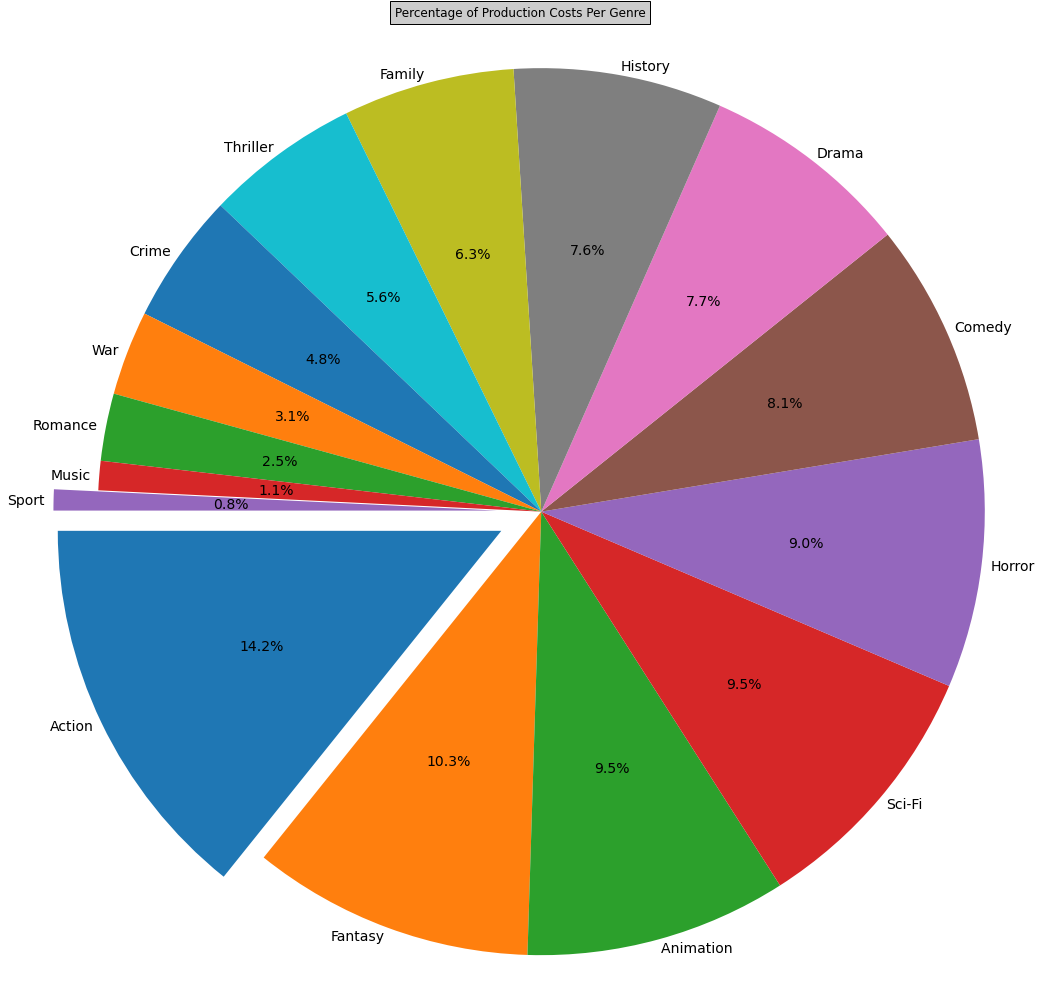

In [14]:
number_of_colors = 15

# Labels for the sections of our pie chart
labels = ["Action", "Fantasy", "Animation ", "Sci-Fi", "Horror", "Comedy", "Drama", "History", "Family", "Thriller", "Crime", "War", "Romance", "Music", "Sport"]

# The values of each section of the pie chart
sizes = [190500000.00, 137413793.10, 127694444.44, 127471428.57, 121000000.00, 108732142.86, 102538461.54, 101666666.67, 83666666.67, 75167826.42, 63750000.00, 41250000.00, 32852941.18, 14250000.00, 10250000.00]

# The colors of each section of the pie chart
colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = number_of_colors)

# Tells matplotlib to separate the "Humans" section from the others
explode = (0.1,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.1)

fig1, ax1 = plt.subplots(figsize=(18,18))
ax1.pie(sizes, labels=labels, autopct="%0.1f%%", labeldistance=1.02, textprops={'fontsize': 14}, startangle=180, explode=explode, shadow=False)
ax1.axis('equal') 
plt.title("Percentage of Production Costs Per Genre", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

In [15]:
studios_df = allmovies_df.groupby(["Studio"])
studios_grouped_df = studios_df.size().sort_values(ascending=False)
studios_grouped_df = pd.DataFrame(studios_grouped_df)
studios_grouped_df

,0
Studio,
Walt Disney Pictures,38
Warner Bros,38
Universal Pictures,33
Paramount Pictures,32
20th Century Fox,23
Metro-Goldwyn-Mayer,14
Columbia Pictures,12
DreamWorks,10
Sony Pictures,9


* Total Movies Per Studio

Breakdown of toal movies produces per studio reflect that Walt Disney Pictures and Warner Bros each had the greatest amount of movies with 38 each. Embassy Pictures accounts for the fewest amounts of movies with only one movie. 

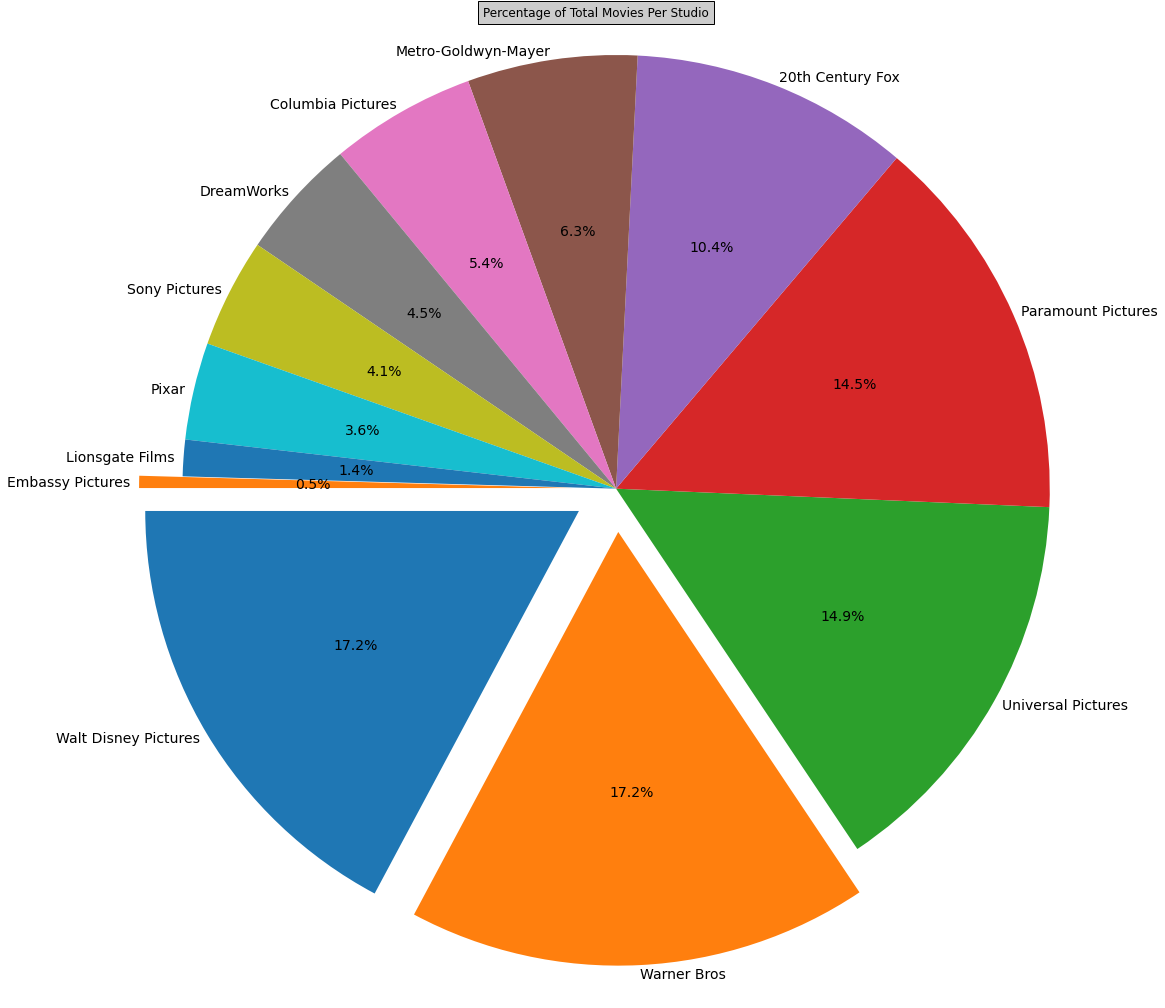

In [16]:
number_of_colors = 12

# Labels for the sections of our pie chart
labels = ["Walt Disney Pictures", "Warner Bros", "Universal Pictures", "Paramount Pictures", "20th Century Fox", "Metro-Goldwyn-Mayer", "Columbia Pictures", "DreamWorks", "Sony Pictures", "Pixar", "Lionsgate Films", "Embassy Pictures"]

# The values of each section of the pie chart
sizes = [38, 38, 33, 32, 23, 14, 12, 10, 9, 8, 3, 1]

# The colors of each section of the pie chart
colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = number_of_colors)

# Tells matplotlib to separate the "Humans" section from the others
explode = (0.1,0.1,0,0,0,0,0,0,0,0,0,0.1)

fig1, ax1 = plt.subplots(figsize=(18,18))
ax1.pie(sizes, labels=labels,  labeldistance=1.02, autopct="%0.1f%%", textprops={'fontsize': 14}, startangle=180, explode=explode, shadow=False)
ax1.axis('equal') 
plt.title("Percentage of Total Movies Per Studio",bbox={'facecolor':'0.8', 'pad':5})
plt.show()

In [17]:
studio_budget = allmovies_df.groupby(["Studio"]).mean()["Production Budget"].sort_values(ascending=False);pd.options.display.float_format = "{:,.2f}".format
studio_budget = pd.DataFrame(studio_budget)
studio_budget

,Production Budget
Studio,
Walt Disney Pictures,"175,676,384.71"
Pixar,"134,500,000.00"
Columbia Pictures,"123,375,000.00"
Warner Bros,"109,302,631.58"
Sony Pictures,"93,777,777.78"
Lionsgate Films,"92,666,666.67"
DreamWorks,"91,800,000.00"
Paramount Pictures,"90,093,750.00"
20th Century Fox,"86,782,608.70"


*Average Production Budget Per Studio

Breakdown of average production budget per studio reflects Walt Disney Pictures averaged the highest production budget per movie with an average budget of $175,676,384.71. 

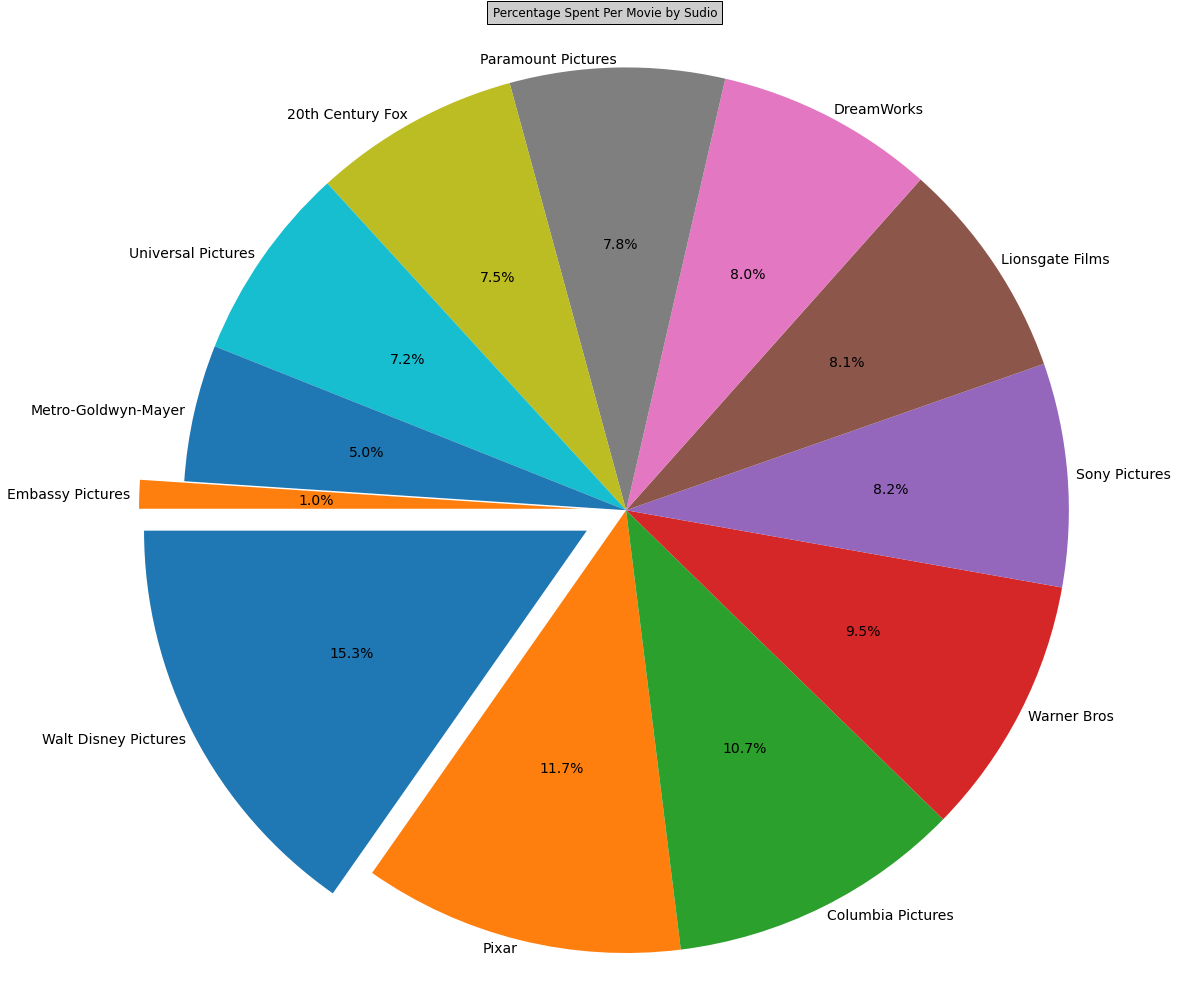

In [18]:
number_of_colors = 12

# Labels for the sections of our pie chart
labels = ["Walt Disney Pictures", "Pixar", "Columbia Pictures", "Warner Bros ", "Sony Pictures", "Lionsgate Films", "DreamWorks", "Paramount Pictures", "20th Century Fox", "Universal Pictures", "Metro-Goldwyn-Mayer", "Embassy Pictures"]

# The values of each section of the pie chart
sizes = [175676384.71, 134500000.00, 123375000.00, 109302631.58, 93777777.78, 92666666.67, 91800000.00, 90093750.00, 86782608.70, 82575757.58, 57392857.14, 12000000.00]

# The colors of each section of the pie chart
colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = number_of_colors)

# Tells matplotlib to separate the "Humans" section from the others
explode = (0.1,0,0,0,0,0,0,0,0,0,0,0.1)

fig1, ax1 = plt.subplots(figsize=(18,18))
ax1.pie(sizes, labels=labels,labeldistance=1.02, autopct="%0.1f%%", startangle=180, textprops={'fontsize': 14}, explode=explode, rotatelabels = False, shadow=False)
ax1.axis('equal') 
plt.title("Percentage Spent Per Movie by Sudio",bbox={'facecolor':'0.8', 'pad':5})
plt.show()

In [65]:
action_counts=allmovies_df.groupby(['Studio', 'Main Genre']).size().reset_index(name='Counts')
action_genre="Action"
action_counts.loc[action_counts['Main Genre']==action_genre].sort_values(by='Counts', ascending=False)

,Studio,Main Genre,Counts
56,Walt Disney Pictures,Action,7
41,Sony Pictures,Action,3
46,Universal Pictures,Action,3
65,Warner Bros,Action,3
0,20th Century Fox,Action,1
8,Columbia Pictures,Action,1
21,Lionsgate Films,Action,1
29,Paramount Pictures,Action,1


*Action Movies Per Studio

Based on prior data it was clear that Action movies account for the highest production budget per genre. It was also evident that Walt Disney pictures not had one of the highest production counts but also averaged the highest production budget per movie. This would lead you to assume that if we looked primarily at the Action genre, we should expect to see Walt Disney Picture with the highest count. Data proves this to be correct as Walt Disney has the highest amount of Action movies with a total count of seven. 

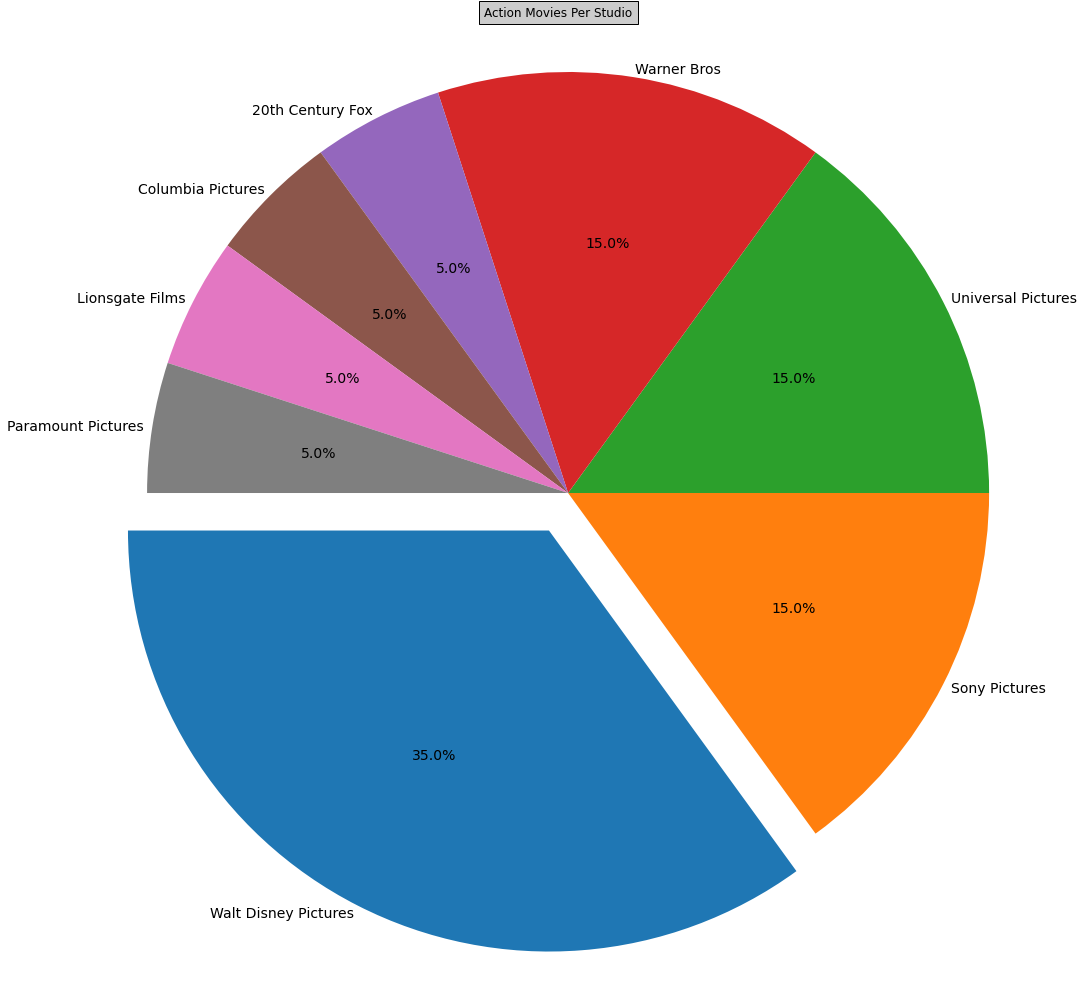

In [66]:
number_of_colors = 8

# Labels for the sections of our pie chart
labels = ["Walt Disney Pictures", "Sony Pictures", "Universal Pictures", "Warner Bros ", "20th Century Fox", "Columbia Pictures", "Lionsgate Films", "Paramount Pictures"]

# The values of each section of the pie chart
sizes = [7, 3, 3, 3, 1, 1, 1, 1]

# The colors of each section of the pie chart
colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = number_of_colors)

# Tells matplotlib to separate the "Humans" section from the others
explode = (0.1,0,0,0,0,0,0,0,)

fig1, ax1 = plt.subplots(figsize=(18,18))
ax1.pie(sizes, labels=labels,labeldistance=1.02, autopct="%0.1f%%", startangle=180, textprops={'fontsize': 14}, explode=explode, rotatelabels = False, shadow=False)
ax1.axis('equal') 
plt.title("Action Movies Per Studio",bbox={'facecolor':'0.8', 'pad':5})
plt.show()

Changes in Cost Over the Years

* main - line

* 1990's

* 2000's

* 2010's

Production Costs per Genre
* pie chart - broken by genre
* pie chart - production companies

Production Cost vs Domestic and Worldwide Gross
* production cost vs domestic - scatter plot
* production cost vs worldwide

Production Cost vs Viewer Ratings
* scatter plot

Director
* bar - combined gross for movies

* top 100 movies directors